# MEU SEGUNDO PROJETO DE DATA SCIENCE

 Beleza, é hora do segundo projetinho: peguei um DF lá o Kaggle que tem um monte de dados sobre videogames! Vejamos o que dá pra tirar dele.
 
Ainda, vou deixar os objetivos desse aqui mais claros:
 - Criar DFs para cada publisher;
 - Criar DFs para cada console;
 - Fazer uma análise de vendas/console;
 - Fazer uma análise de vendas/publisher;
 - Gráficos de vendas/console;
 - Gráficos de vendas/publisher.

E bora lá!
 

In [1]:
###Importar bibliotecas e pá

#Numpy né rapaz
import numpy as np
#Pandoso também
import pandas as pd
#Isso aí é pra dar pra abrir os arquivos que estão na pasta "data", e possuem as notas
import os
#Sei lá pra que são esses
import collections
import operator
#Matplotlib pros graficosos, e Seaborn para a parte BIOTIFUL
import matplotlib.pyplot as plt
import seaborn as sns
#Isso é para os gráficos aparecerem aqui dentro do Jupyter
%matplotlib inline

In [2]:
###Vamos carregar o nosso DF

caminho_para_os_dados = str(os.getcwd() + '/data')
vgsales = pd.read_csv(caminho_para_os_dados + '/' + 'vgsales.csv')
vgsales.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
###Criar uma lista com todas as publishers
lista_de_publishers = list(set(vgsales['Publisher']))

###E agora fazer isso para os consoles também
lista_de_consoles = list(set(vgsales['Platform']))

###E fazer um para a classificação etária também, pfft.
lista_de_classificacoes = list(set(vgsales['Rating']))

In [4]:
###Fazer um dicionario de dataframes com as publishers agora eu acho.
lista_de_dataframes_de_publishers = {}
for publisher in lista_de_publishers: lista_de_dataframes_de_publishers[publisher] = vgsales[vgsales['Publisher'] == publisher].drop(columns = ['Publisher'])

###Fazer o mesmo com os consoles, why not.
lista_de_dataframes_por_consoles = {}
for console in lista_de_consoles: lista_de_dataframes_por_consoles[console] = vgsales[vgsales['Platform'] == console].drop(columns = ['Platform']) 
    
###E o mesmo para as classificações.
lista_de_dataframes_por_classificacoes = {}
for classificacao in lista_de_classificacoes: lista_de_dataframes_por_classificacoes[classificacao] = vgsales[vgsales['Rating'] == classificacao].drop(columns = ['Rating']) 

In [5]:
###Hm, vejamos o número de jogos vendidos de acordo com os consoles. Para guardar o número de vendas, usaremos uma série.
vendas_por_console = pd.Series()
for console in lista_de_consoles:
    vendas_por_console[console] = lista_de_dataframes_por_consoles[console]['Global_Sales'].sum()
vendas_por_console = vendas_por_console.sort_values(ascending = False)

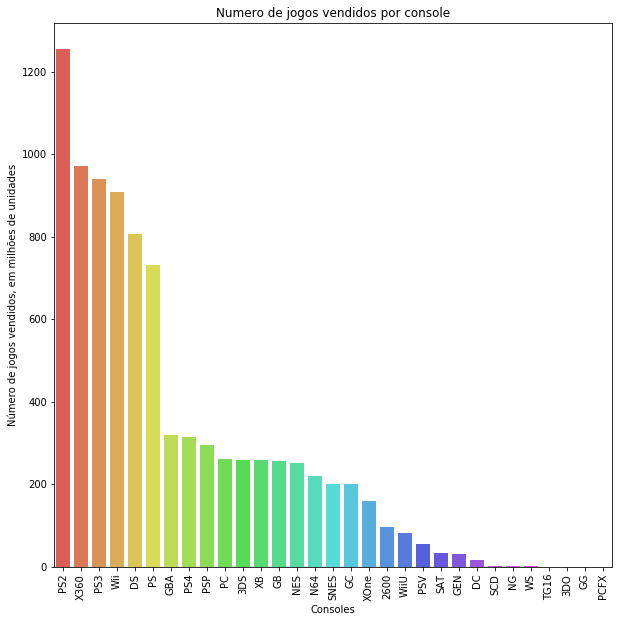

In [6]:
###Beleza, agora vamos fazer um plot dessa série!
grafico = plt.subplots(figsize = (10, 10))[1]

sns.barplot(ax = grafico,
            x = vendas_por_console.index,
            y = vendas_por_console.values,
            palette = 'hls',
            saturation = 1)
grafico.set_title('Numero de jogos vendidos por console')
grafico.set_xlabel('Consoles')
grafico.set_ylabel('Número de jogos vendidos, em milhões de unidades')
_ = grafico.set_xticklabels(labels = vendas_por_console.index, rotation = 90)

In [7]:
###Legal, fazer algo parecido com publishers, mas dividindo elas entre "Vendeu mais de 5m jogos" e
###"Vendeu menos de 5m jogos"

vendas_por_publisher_maiores = pd.Series()
vendas_por_publisher_menores = pd.Series()

for publisher in lista_de_publishers:
    vendas = lista_de_dataframes_de_publishers[publisher]['Global_Sales'].sum()
    if vendas > 10:
        vendas_por_publisher_maiores[publisher] = vendas
    elif vendas > 2.5:
        vendas_por_publisher_menores[publisher] = vendas
    else:
        pass

vendas_por_publisher_maiores = vendas_por_publisher_maiores.sort_values(ascending = False)
vendas_por_publisher_menores = vendas_por_publisher_menores.sort_values(ascending = False)

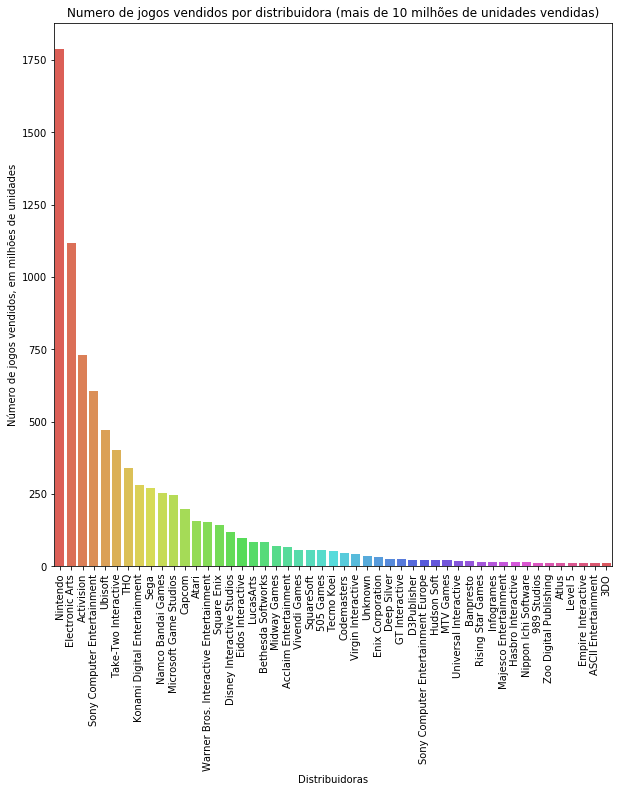

In [8]:
###E agora, os gráficos, começando pelas publishers maiores
grafico = plt.subplots(figsize = (10, 10))[1]

sns.barplot(ax = grafico,
           x = vendas_por_publisher_maiores.index,
           y = vendas_por_publisher_maiores.values,
           palette = 'hls',
           saturation = 1)

grafico.set_title('Numero de jogos vendidos por distribuidora (mais de 10 milhões de unidades vendidas)')
grafico.figsize = (10, 10)
grafico.set_xlabel('Distribuidoras')
grafico.set_ylabel('Número de jogos vendidos, em milhões de unidades')
_ = grafico.set_xticklabels(labels = vendas_por_publisher_maiores.index, rotation = 90)

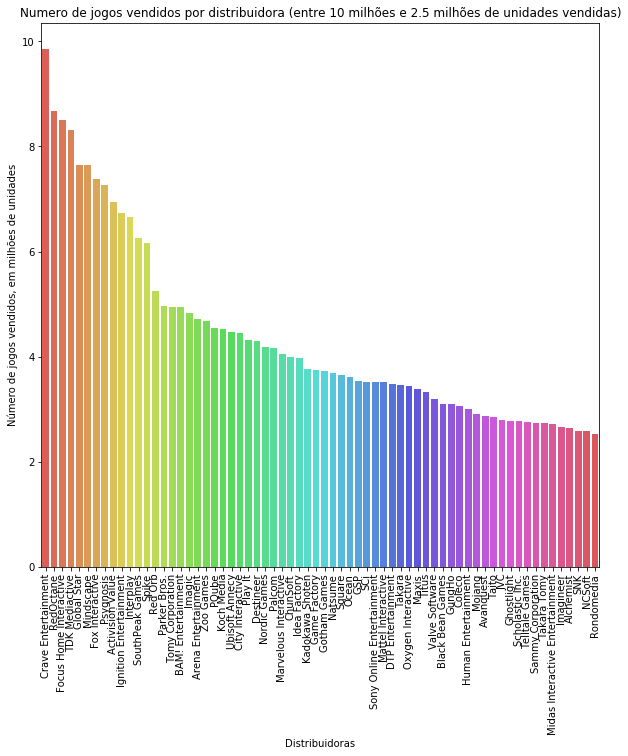

In [9]:
###E agora o gráfico para as menorzinhas
###E agora, os gráficos, começando pelas publishers maiores
grafico = plt.subplots(figsize = (10, 10))[1]

sns.barplot(ax = grafico,
           x = vendas_por_publisher_menores.index,
           y = vendas_por_publisher_menores.values,
           palette = 'hls',
           saturation = 1)

grafico.set_title('Numero de jogos vendidos por distribuidora (entre 10 milhões e 2.5 milhões de unidades vendidas)')
grafico.figsize = (10, 10)
grafico.set_xlabel('Distribuidoras')
grafico.set_ylabel('Número de jogos vendidos, em milhões de unidades')
_ = grafico.set_xticklabels(labels = vendas_por_publisher_menores.index, rotation = 90)

In [10]:
###Tá, e por fim, uma análise bem breve de como as vendas estão divididas de acordo com a classificação etária.
vendas_por_classificacao = pd.Series()
vendas_por_classificacao['Outras'] = 0
for classificacao in lista_de_classificacoes:
    numero_de_jogos_com_esta_classificacao = lista_de_dataframes_por_classificacoes[classificacao]['Global_Sales'].sum()
    if numero_de_jogos_com_esta_classificacao > 500:
        vendas_por_classificacao[classificacao] = numero_de_jogos_com_esta_classificacao
    else:
        vendas_por_classificacao['Outras'] += numero_de_jogos_com_esta_classificacao
vendas_por_classificacao = vendas_por_classificacao.sort_values(ascending = False)

Text(0,0.5,'Número de jogos vendidos, em milhões de unidades')

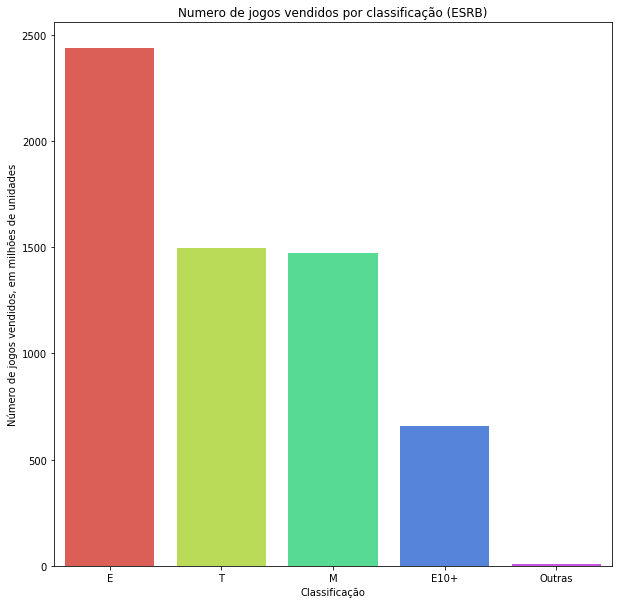

In [11]:
###E um plot disso agora.
grafico = plt.subplots(figsize = (10, 10))[1]

sns.barplot(ax = grafico,
            x = vendas_por_classificacao.index,
            y = vendas_por_classificacao.values,
            palette = 'hls',
            saturation = 1)
grafico.set_title('Numero de jogos vendidos por classificação (ESRB)')
grafico.set_xlabel('Classificação')
grafico.set_ylabel('Número de jogos vendidos, em milhões de unidades')